# Solovay-Strassen Test

### 1). Jacobi Symbol :

For an odd integer $n\geq 3$ with decomposition $n=p_1^{k_1} p_2^{k_2} p_3^{k_3} ....p_r^{k_r}$ and $a\in \mathbb{Z}$ let
$$
\bigg(\frac{a}{n}\bigg)= \bigg(\frac{a}{p_1}\bigg)^{k_1} \bigg( \frac{a}{p_2} \bigg)^{k_2}.......\bigg(\frac{a}{p_r}\bigg)^{k_r}
$$
$\big(\frac{a}{n}\big)$ is called Jacobi Symbol of $a$ and $n$.

where $\big(\frac{a}{p}\big)$ for prime $p$ is Legendre Symbol, defined as:


\begin{equation*}
\text{}~~\bigg(\frac{a}{p}\bigg)=\left\{
\begin{array}{rl}
0,  & \text{If $a=k.p$ for some integer $k$}\\
1, & \text{If a is a quadratic residue mod p}\\
-1, & \text{If a is a quadratic non-residue mod p.}
\end{array}\right.
\end{equation*}


#### Steps for Computation of Jacobi Symbol  :

- If $a\not\in \{1,....,n-1\}$, result is $\big(\frac{a\ mod\ n}{n}\big)$
- If $a=0$, output 0, if $a=1$, output 1
- If $4\mid a$, result is $\big(\frac{a/4}{n}\big)$
- If $2\mid a$and $n\ (mod\ 8)\in \{1,7\}$, result is $\big(\frac{a/2}{n}\big)$
- If $2\mid a$and $n\ (mod\ 8)\in \{3,5\}$, result is $-\big(\frac{a/2}{n}\big)$
- If $a>1$ and $a\ (mod\ 4)=1$ or $n\ (mod\ 4)=1$, result is $\big(\frac{n\ mod\ a}{n}\big)$
- If $a\ (mod\ 4)=3$ and $n\ (mod\ 4)=3$, result is $- \big(\frac{n\ mod\ a}{n}\big)$

In [6]:
def jacobi(N,x):
        b=x%N
        c=N
        s=1
        while b>=2:
            while b%4==0:
                b = b/4
            if b%2 == 0:
                if c%8==3 or c%8==5:
                    s = -s
                b=b/2
            if b==1:
                break
            if b%4==c%4==3:
                s=-s
            b1=b
            b=c%b
            c=b1
        return s

In [49]:
jacobi(1373,773)

1

In [50]:
jacobi(1234567856333457235432643,232323532)

-1

### 2). Solovay-Strassen Test

We select a random base $a\in \{2,...,n-1\}$ and check whether or not $$
a^{n-1/2}.\bigg(\frac{a}{n}\bigg)\ (mod\ n)= 1.
$$

If it is then we check for another $a$, best way is to input a bound for number of $a$, if above condition is not satisfied than $n$ is definite composite. 

In [7]:
import math as m
import random 
def sstest(number):
        base = random.randint(2,number-1)
        gcd = m.gcd(base,number)
        if gcd!=1:
            return "Composite"
        else:
            euler = pow(base,int((number-1)/2),number)
            jacob = jacobi(number,base)
            if euler != 1:
                if euler!= number-1:        
                    return "Composite"
                else:                    
                    if jacob != -1:          
                        return "Composite"
                    else:                   
                        return "Probable Prime"
            else:                       
                if jacob!=1:                
                    return "Composite"
                else:                       
                    return "Probable Prime"

In [54]:
# SS TEST
import random 
def sstest(number,k):
            base = random.randint(2,number-1)
            gcd = m.gcd(base,number)
            euler = pow(base,int((number-1)/2),number)
            jacob = jacobi(number,base)
            for i in range(k):
                if euler != 1:
                    if euler!= number-1:        
                        return "Composite"
                    else:                    
                        if jacob != -1:          
                            return "Composite"  
                        else:
                            base = random.randint(2,number-1)
                        
                else:                       
                    if jacob!=1:                
                        return "Composite"
                    else:                       
                        base = random.randint(2,number-1)
            return "Probable Prime"

In [56]:
sstest(20991129234731,10)   # This is a factorial(n!-1 or n!+1 type) prime integer

'Probable Prime'

In [57]:
sstest(9487897987986068049,10)

'Composite'

In [58]:
import matplotlib.pyplot as plt
import time
import math
def analysis(B):
    x = []
    y = []
    for n in range(2,B):
        start = 10**(n)
        end = 10**(n+1)
        x.append(n)
        L = random.randint(start,end)
        strt = time.perf_counter()
        sstest(L,10)
        end = time.perf_counter()
        y.append(end-strt)
    plt.figure(figsize=(15,10))
    plt.title("sstest(N) Execution Time Variation")
    plt.plot(x,y, color = 'b')
    plt.xlabel('No. of Digits in N')
    plt.ylabel('Time of Execution')
    plt.show()

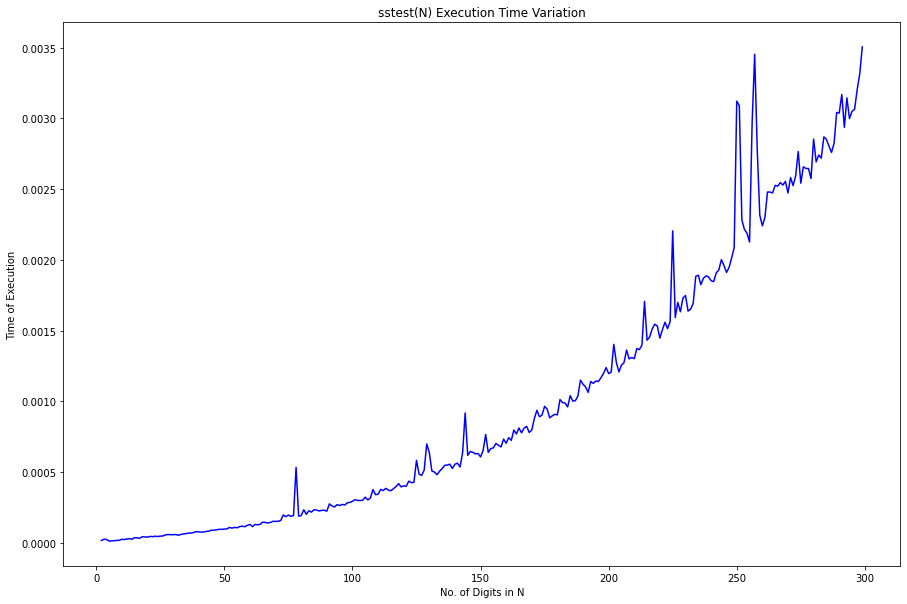

In [59]:
analysis(300)

### Fermat's test VS Miller-rabin test VS Solovay-strassen test

In [43]:
# FERMAT'S TEST
import random 
def fermat(n,k):
    for i in range(k):
        a = random.randint(2,n)
        if pow(a,n,n)!= pow(a,1,n):
            return "Definite Composite"
    return "Probable Prime"

In [44]:
# MILLER RABIN TEST
import random 
def rabin_miller(N,k): # N : Any odd integer
        m=(N-1)/2
        h=1
        while m%2==0:
            m=int(m/2)
            h = h+1
        m = int(m)
        for i in range(k):
            x = random.randint(2,N-1)
            if pow(x,m,N)!=1:
                l=0
                for j in range(h):
                    if pow(x,pow(2,j)*m,N)!=N-1:
                        l=l+1
                if l==h:
                    return "Composite"
        return "Undecided"

In [52]:
import matplotlib.pyplot as plt
import time
import math
def analysis(B):
    x = []
    y = []
    y1 = []
    y2 = []
    for n in range(2,B):
        start = 10**(n)
        end = 10**(n+1)
        x.append(n)
        L = random.randint(start,end)
        
        strt = time.perf_counter()
        sstest(L,10)
        end = time.perf_counter()
        y.append(end-strt)
        
        strt = time.perf_counter()
        fermat(L,10)
        end = time.perf_counter()
        y1.append(end-strt)
        
        strt = time.perf_counter()
        rabin_miller(L,10)
        end = time.perf_counter()
        y2.append(end-strt)
        
    plt.figure(figsize=(20,10))
    plt.title("Execution Time Variation")
    plt.plot(x,y, color = 'b')
    plt.plot(x,y1, color = 'r')
    #plt.plot(x,y2, color = 'g')
    plt.xlabel('No. of Digits in N')
    plt.ylabel('Time of Execution')
    #plt.legend(["Solovay-strassen","Fermat's test","Rabin-Miller Test"])
    plt.legend(["Solovay-strassen","Fermat's test"])
    plt.show()

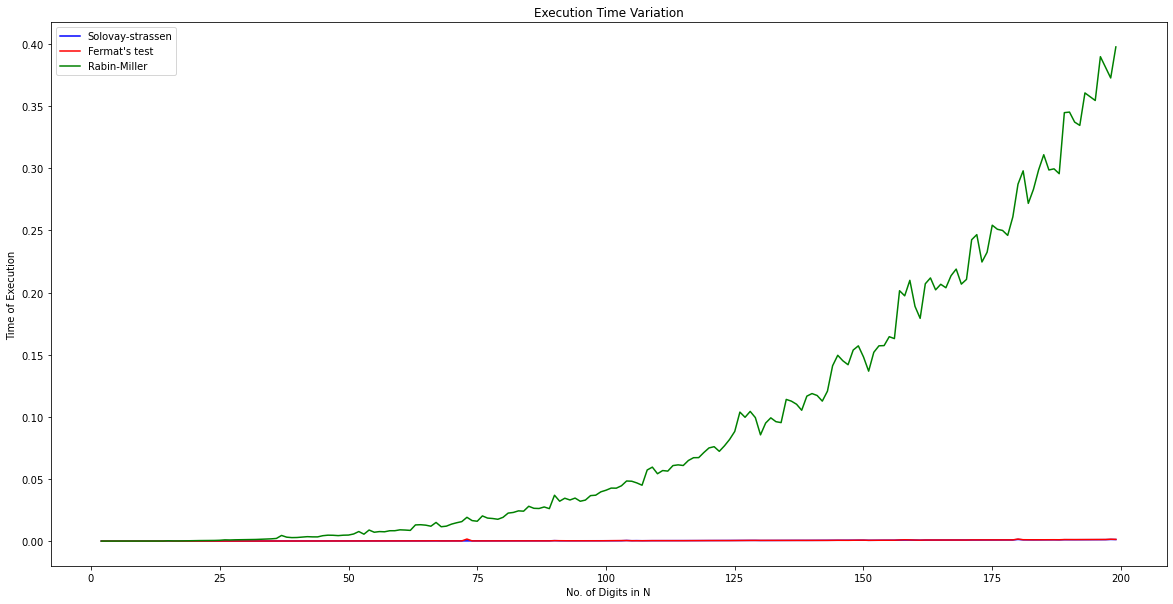

In [51]:
analysis(200)

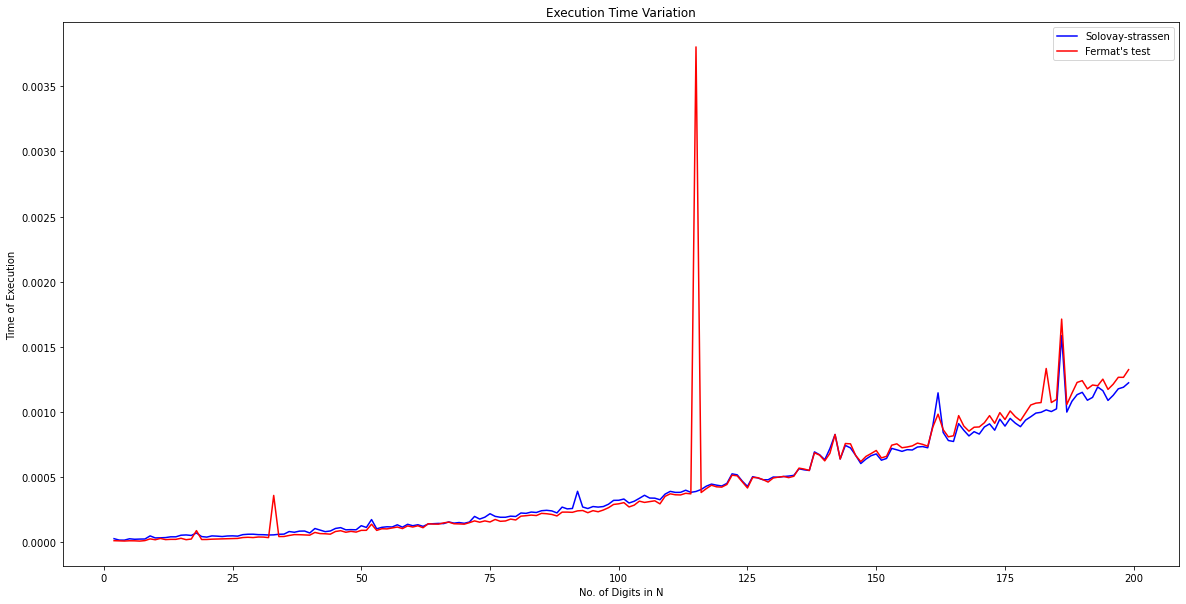

In [53]:
analysis(200)